<a href="https://colab.research.google.com/github/Adithya759/Adithya/blob/main/Fish_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster


In [42]:
from google.colab import files
upload= files.upload()

Saving fish.csv to fish (2).csv


In [43]:
df_fish=pd.read_csv('/content/fish.csv', header=None)
display(df_fish.head(3))

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1


#Preprocessing


In [44]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       85 non-null     object 
 1   1       85 non-null     float64
 2   2       85 non-null     float64
 3   3       85 non-null     float64
 4   4       85 non-null     float64
 5   5       85 non-null     float64
 6   6       85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [45]:
df_fish.describe()

,1,2,3,4,5,6
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [46]:
fish_num = df_fish.select_dtypes(include=['number']).columns.tolist()
print(fish_num)

[1, 2, 3, 4, 5, 6]


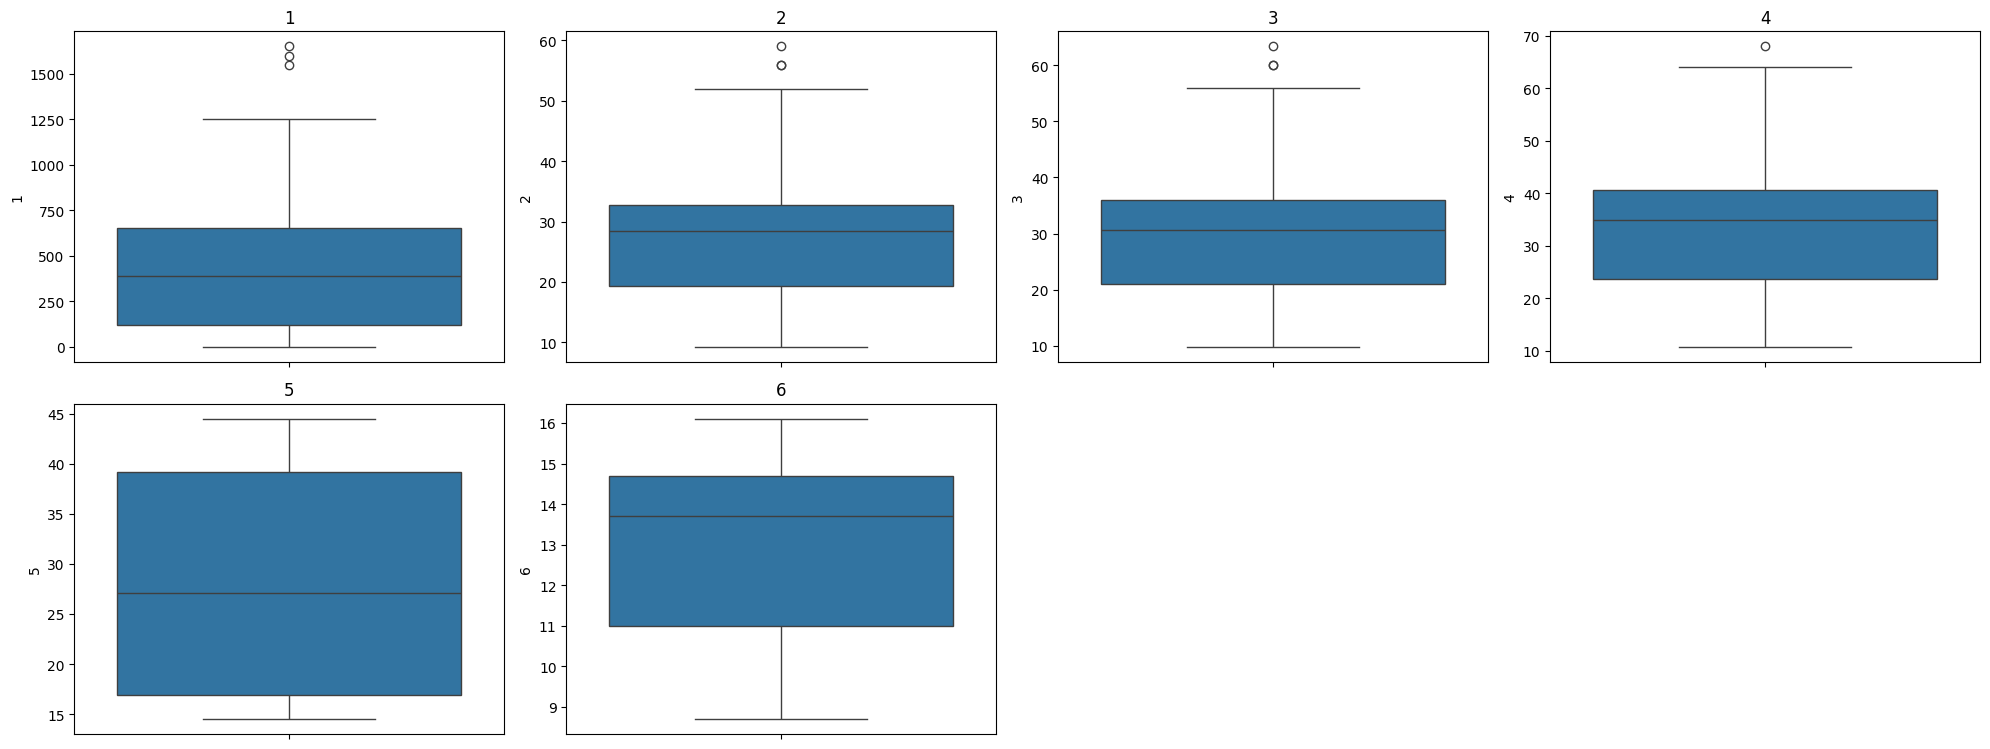

In [47]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(fish_num):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_fish[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [48]:
fish_out_num=[1, 2, 3, 4]
Q1 = df_fish[fish_out_num].quantile(0.25)
Q3 = df_fish[fish_out_num].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR
print(Q1, Q3, IQR, low_limit, up_limit)

1    120.0
2     19.4
3     21.0
4     23.7
Name: 0.25, dtype: float64 1    650.0
2     32.7
3     36.0
4     40.6
Name: 0.75, dtype: float64 1    530.0
2     13.3
3     15.0
4     16.9
dtype: float64 1   -675.00
2     -0.55
3     -1.50
4     -1.65
dtype: float64 1    1445.00
2      52.65
3      58.50
4      65.95
dtype: float64


In [49]:
non_outliers = ~((df_fish[fish_out_num] < low_limit) | (df_fish[fish_out_num] > up_limit)).any(axis=1)

In [50]:
from sklearn.preprocessing import MinMaxScaler

df_fish_new = df_fish[non_outliers].copy()
df_fish_new.columns = df_fish.columns # Assign original column names
df_fish_new[fish_num] = MinMaxScaler(feature_range=(0,1)).fit_transform(df_fish_new[fish_num])

In [51]:
df_fish.shape

(85, 7)

In [52]:
df_fish_new.shape

(82, 7)

In [53]:
df_fish_new[fish_num] = MinMaxScaler(feature_range=(0,1)).fit_transform(df_fish_new[fish_num])
df_fish_new

,0,1,2,3,4,5,6
0,Bream,0.1936,0.325527,0.337662,0.392638,0.796667,0.635135
1,Bream,0.2320,0.344262,0.357143,0.417178,0.850000,0.689189
2,Bream,0.2720,0.341920,0.361472,0.415133,0.843333,0.864865
3,Bream,0.2904,0.398126,0.415584,0.464213,0.783333,0.621622
4,Bream,0.3440,0.402810,0.415584,0.474438,0.736667,0.864865
...,...,...,...,...,...,...,...
77,Pike,0.4000,0.765808,0.761905,0.760736,0.000000,0.202703
78,Pike,0.4536,0.793911,0.783550,0.775051,0.050000,0.175676
79,Pike,0.6160,0.831382,0.826840,0.826176,0.016667,0.243243
80,Pike,0.7600,0.913349,0.906926,0.905930,0.056667,0.337838


In [54]:
X = df_fish_new.iloc[:, [1, 6]].values

#KMeans

In [55]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

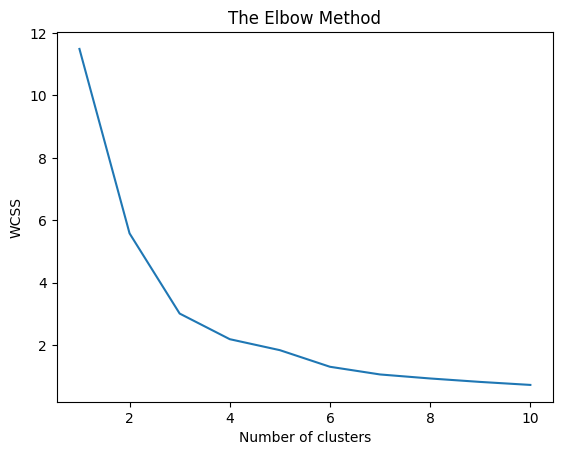

In [56]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
kmeans=KMeans(n_clusters=3,init='k-means++') #model building
#max_iter can be set if we need to fix the number of iterations
y_kmeans=kmeans.fit_predict(X)

In [58]:
df_fish_new['Cluster']=y_kmeans
df_fish_new.head(10)

,0,1,2,3,4,5,6,Cluster
0,Bream,0.1936,0.325527,0.337662,0.392638,0.796667,0.635135,2
1,Bream,0.2320,0.344262,0.357143,0.417178,0.850000,0.689189,2
2,Bream,0.2720,0.341920,0.361472,0.415133,0.843333,0.864865,2
3,Bream,0.2904,0.398126,0.415584,0.464213,0.783333,0.621622,2
4,Bream,0.3440,0.402810,0.415584,0.474438,0.736667,0.864865,2
5,Bream,0.3600,0.409836,0.430736,0.488753,0.823333,0.743243,2
6,Bream,0.4000,0.409836,0.430736,0.484663,0.886667,0.891892,2
7,Bream,0.3120,0.428571,0.437229,0.494888,0.723333,0.635135,2
8,Bream,0.3600,0.428571,0.437229,0.496933,0.846667,0.689189,2
9,Bream,0.4000,0.449649,0.452381,0.519427,0.826667,0.675676,1


#Visual Representation of Clusters

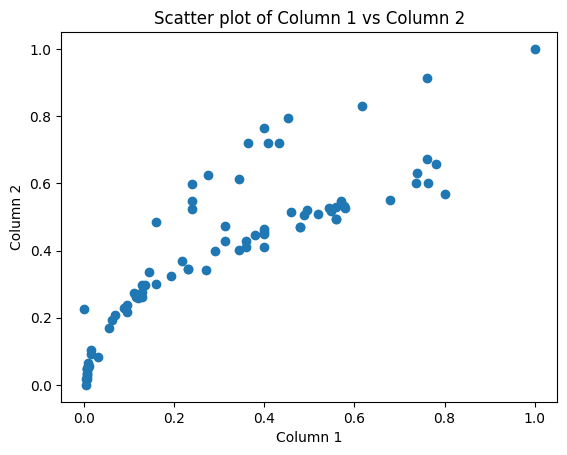

In [59]:
#Before
plt.scatter(df_fish_new[1],df_fish_new[2])
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Scatter plot of Column 1 vs Column 2')
plt.show()

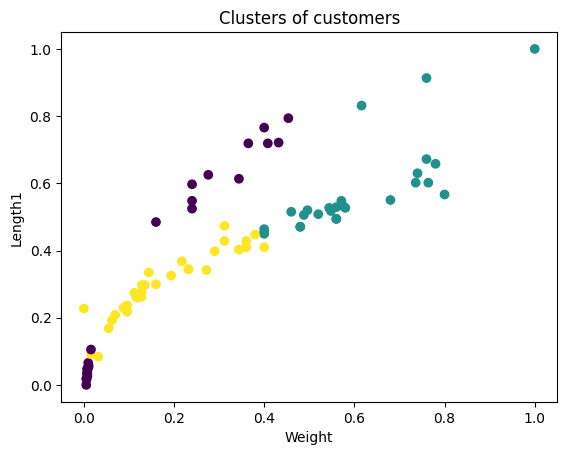

In [60]:
#after clustering
plt.scatter(df_fish_new[1],df_fish_new[2], c= df_fish_new['Cluster'])
plt.title('Clusters of customers')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

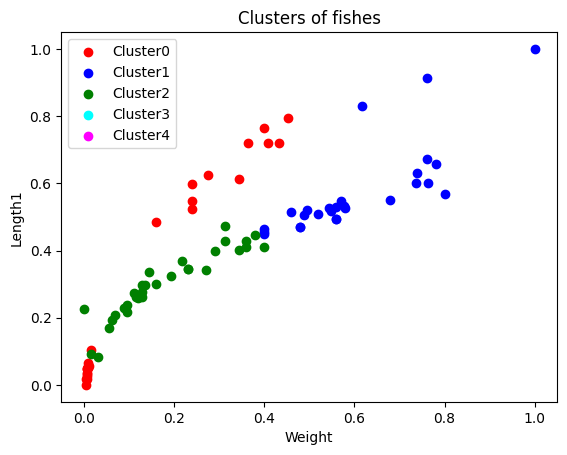

In [61]:
colors= ['red','blue','green','cyan','magenta']
for i in range(5):
  cluster_data= df_fish_new[y_kmeans==i]
  plt.scatter(df_fish_new[df_fish_new['Cluster']==i][1],
              df_fish_new[df_fish_new['Cluster']==i][2],
              c=colors[i],label=f'Cluster{i}')
plt.legend()
plt.title('Clusters of fishes')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

In [62]:
#predict the cluster
def predict_cluster(a,b,c,d,e,f):
  new_data= [[a,b,c,d,e,f]]
  cluster=kmeans.predict(new_data)
  return cluster[0]

In [64]:
from sklearn.preprocessing import MinMaxScaler

df_fish_new = df_fish[non_outliers].copy()
df_fish_new.columns = df_fish.columns # Assign original column names
df_fish_new[fish_num] = MinMaxScaler(feature_range=(0,1)).fit_transform(df_fish_new[fish_num])

x = df_fish_new.drop(columns=[])
x

,0,1,2,3,4,5,6
0,Bream,0.1936,0.325527,0.337662,0.392638,0.796667,0.635135
1,Bream,0.2320,0.344262,0.357143,0.417178,0.850000,0.689189
2,Bream,0.2720,0.341920,0.361472,0.415133,0.843333,0.864865
3,Bream,0.2904,0.398126,0.415584,0.464213,0.783333,0.621622
4,Bream,0.3440,0.402810,0.415584,0.474438,0.736667,0.864865
...,...,...,...,...,...,...,...
77,Pike,0.4000,0.765808,0.761905,0.760736,0.000000,0.202703
78,Pike,0.4536,0.793911,0.783550,0.775051,0.050000,0.175676
79,Pike,0.6160,0.831382,0.826840,0.826176,0.016667,0.243243
80,Pike,0.7600,0.913349,0.906926,0.905930,0.056667,0.337838


#Agglomerative Hierachial Clustering

In [66]:
ag_cluster = linkage(df_fish_new[fish_num], method='ward')

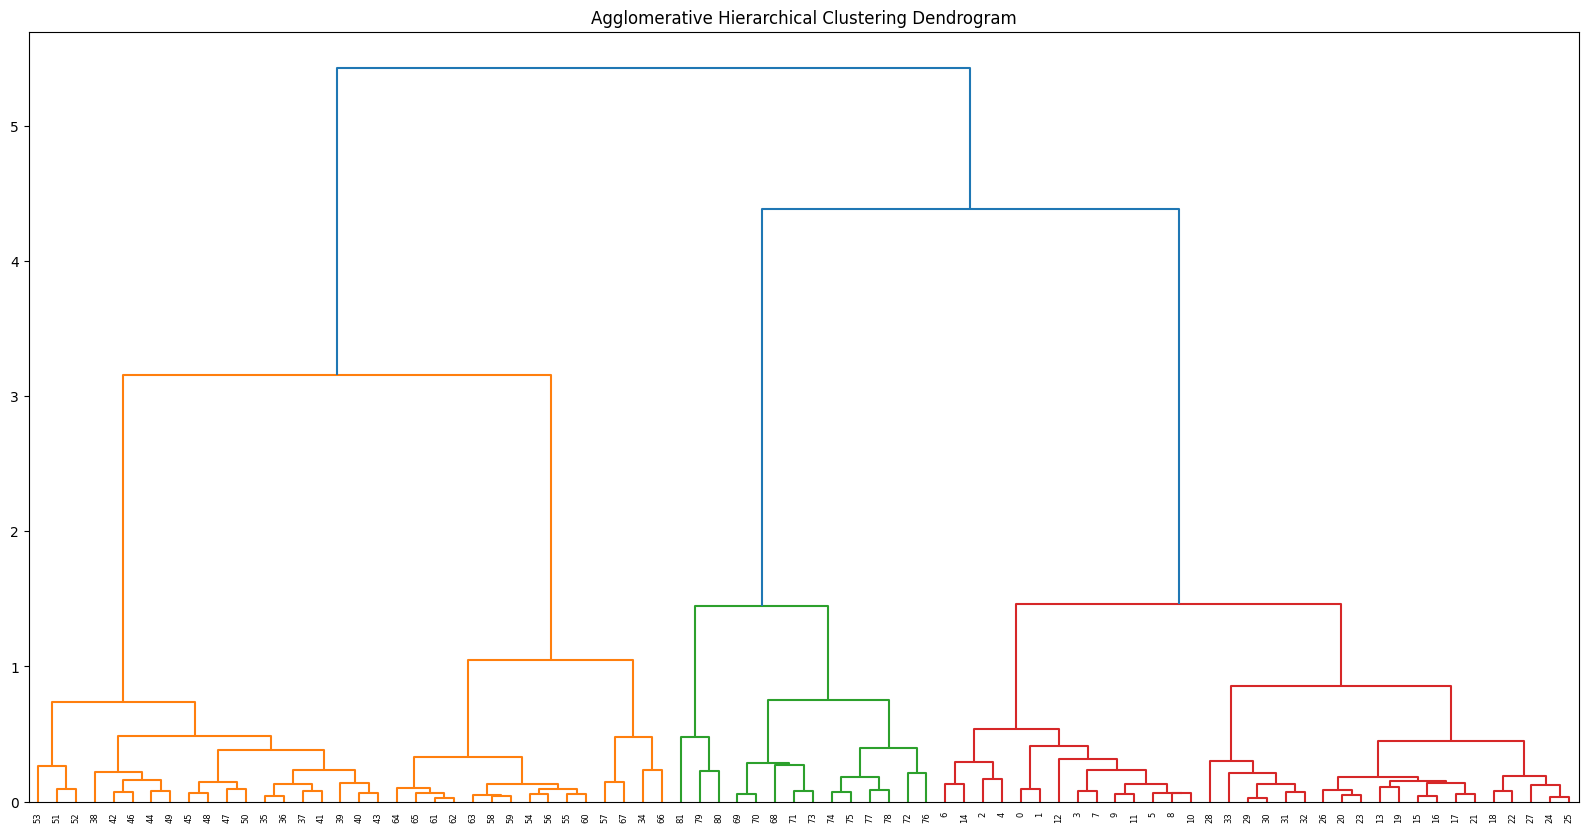

In [67]:
plt.figure(figsize=(20,10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.axhline(y=200, color='y',linestyle='--')
dendrogram(ag_cluster)
plt.show()

In [68]:
cluster_labels=fcluster(ag_cluster, t=200, criterion='distance')
x['cluster_agglomerative']= cluster_labels
x.head()

,0,1,2,3,4,5,6,cluster_agglomerative
0,Bream,0.1936,0.325527,0.337662,0.392638,0.796667,0.635135,1
1,Bream,0.2320,0.344262,0.357143,0.417178,0.850000,0.689189,1
2,Bream,0.2720,0.341920,0.361472,0.415133,0.843333,0.864865,1
3,Bream,0.2904,0.398126,0.415584,0.464213,0.783333,0.621622,1
4,Bream,0.3440,0.402810,0.415584,0.474438,0.736667,0.864865,1


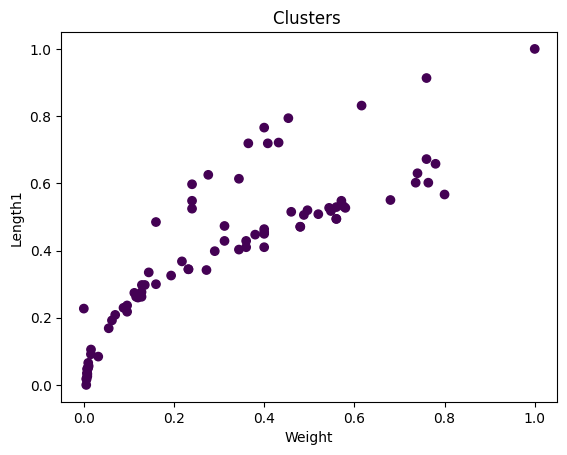

In [70]:
#after
plt.scatter(x[1],x[2], c= x['cluster_agglomerative'])
plt.title('Clusters ')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()